# Read data

In [1]:
UK_hourse_price = read.csv("UK-HPI-full-file-2022-01.csv", header=TRUE, stringsAsFactors=FALSE)

In [2]:
people_qualification = read.csv("Qualifications-of-working-age-NVQ.csv", header=TRUE, stringsAsFactors=FALSE)

In [3]:
head(UK_hourse_price)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,X1m.Change,X12m.Change,AveragePriceSA,SalesVolume,⋯,NewPrice,NewIndex,New1m.Change,New12m.Change,NewSalesVolume,OldPrice,OldIndex,Old1m.Change,Old12m.Change,OldSalesVolume
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/01/2004,Aberdeenshire,S12000034,81693.67,40.86421,NA,NA,NA,NA,388,⋯,88436.14,40.26725,NA,NA,103,81043.95,40.88337,NA,NA,285
2,01/02/2004,Aberdeenshire,S12000034,81678.76,40.85676,NA,-0.01824784,NA,NA,326,⋯,88606.45,40.34479,0.19257621,NA,107,80965.30,40.84369,-0.0970528,NA,219
3,01/03/2004,Aberdeenshire,S12000034,83525.10,41.78032,NA,2.26048321,NA,NA,453,⋯,90296.91,41.11451,1.90783778,NA,140,82903.24,41.82130,2.3935490,NA,313
4,01/04/2004,Aberdeenshire,S12000034,84333.68,42.18478,NA,0.96807069,NA,NA,571,⋯,90319.88,41.12496,0.02543242,NA,180,84003.99,42.37659,1.3277553,NA,391
5,01/05/2004,Aberdeenshire,S12000034,86379.95,43.20835,NA,2.42640304,NA,NA,502,⋯,91989.18,41.88504,1.84820796,NA,167,86222.73,43.49585,2.6412355,NA,335
6,01/06/2004,Aberdeenshire,S12000034,89267.61,44.65280,NA,3.34297364,NA,NA,525,⋯,94964.60,43.23983,3.23453871,NA,164,89139.78,44.96738,3.3831499,NA,361


In [4]:
head(people_qualification)

,Code,Area,Year,Qualifications.of.working.age.population..16.64.,number,denominator,percent,confidence
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,E09000001,City of London,2004,NVQ4+,"3,500","4,300",80.6,*
2,E09000002,Barking and Dagenham,2004,NVQ4+,"14,300","101,800",14.1,3
3,E09000003,Barnet,2004,NVQ4+,"77,100","206,600",37.3,4
4,E09000004,Bexley,2004,NVQ4+,"21,400","134,900",15.8,3.3
5,E09000005,Brent,2004,NVQ4+,"43,800","178,400",24.5,3.4
6,E09000006,Bromley,2004,NVQ4+,"62,600","180,500",34.7,3.9


In [5]:
#install.packages("tidyr")

#### Qualification level explaination

Qualifications of working age population (16-64), and proportion of people aged 25-64 with each level of qualification.

Highest level of Qualification held (None, Other, NVQ1,2,3,4+), of working-age people.

 

No qualifications	‘No qualifications’: No academic or professional qualifications.

Level 1	‘1-4 GCSEs or equivalent’ (Level 1 qualifications): 1-4 O Levels/CSE/GCSEs (any grades), Entry Level, Foundation Diploma, NVQ level 1, Foundation GNVQ, Basic/Essential Skills.

Level 2	‘5+ GCSEs or equivalent’ (Level 2 qualifications): 5+ O Level (Passes)/CSEs (Grade 1)/GCSEs (Grades A*-C), School Certificate, 1 A Level/ 2-3 AS Levels/VCEs, Intermediate/Higher Diploma, Welsh Baccalaureate Intermediate Diploma, NVQ level 2, Intermediate GNVQ, City and Guilds Craft, BTEC First/General Diploma, RSA Diploma.

Trade Apprenticeship	‘Apprenticeship’: Apprenticeship.

Level 3	‘2+ A-levels or equivalent’ (Level 3 qualifications): 2+ A Levels/VCEs, 4+ AS Levels, Higher School Certificate, Progression/Advanced Diploma, Welsh Baccalaureate Advanced Diploma, NVQ Level 3; Advanced GNVQ, City and Guilds Advanced Craft, ONC, OND, BTEC National, RSA Advanced Diploma.

Level 4+	‘Degree level or above’ (Level 4 qualifications and above): Degree (for example BA, BSc), Higher Degree (for example MA, PhD, PGCE), NVQ Level 4-5, HNC, HND, RSA Higher Diploma, BTEC Higher level, Foundation degree (NI), Professional qualifications (for example teaching, nursing, accountancy).

Other qualifications	‘Other qualifications’: Vocational/Work-related Qualifications, Foreign Qualifications/Qualifications gained outside the UK (NI) (Not stated/level unknown).

# Select the nessesary columns

Since the people's education qualification in each local authority is recorded by year, however, the UK housing price is recorded monthly and stored as day/month/year format. Thus, we need to convert the monthly data and integrate them to yearly data. For the aggregate and mergre purpose at the later stage we need to ensure the merging item/column's name in each dataframe are the same.

In [6]:
library(tidyr)
UK_hourse_price = UK_hourse_price[,1:4]

UK_hourse_price <- separate(UK_hourse_price, Date, into = c("day", "month", "year"), sep = "/")
UK_hourse_price = UK_hourse_price[,3:6]

In [7]:
names(UK_hourse_price)[3] <- "Code"
head(UK_hourse_price)

,year,RegionName,Code,AveragePrice
,<chr>,<chr>,<chr>,<dbl>
1,2004,Aberdeenshire,S12000034,81693.67
2,2004,Aberdeenshire,S12000034,81678.76
3,2004,Aberdeenshire,S12000034,83525.10
4,2004,Aberdeenshire,S12000034,84333.68
5,2004,Aberdeenshire,S12000034,86379.95
6,2004,Aberdeenshire,S12000034,89267.61


Aggregate the monthly data in each local authority to yearly and names each columns

In [8]:
UK_hourse_price_agg = aggregate(UK_hourse_price[,4], by=list(UK_hourse_price$year, UK_hourse_price$RegionName, UK_hourse_price$Code),FUN=mean, na.rm=TRUE)
head(UK_hourse_price_agg)

,Group.1,Group.2,Group.3,x
,<chr>,<chr>,<chr>,<dbl>
1,1995,Hartlepool,E06000001,40691.89
2,1996,Hartlepool,E06000001,39904.88
3,1997,Hartlepool,E06000001,39702.56
4,1998,Hartlepool,E06000001,40875.98
5,1999,Hartlepool,E06000001,40578.50
6,2000,Hartlepool,E06000001,43574.22


In [9]:
colnames(UK_hourse_price_agg) <- c("Year", "Area", "Code", "AvgPrice")
head(UK_hourse_price_agg)

,Year,Area,Code,AvgPrice
,<chr>,<chr>,<chr>,<dbl>
1,1995,Hartlepool,E06000001,40691.89
2,1996,Hartlepool,E06000001,39904.88
3,1997,Hartlepool,E06000001,39702.56
4,1998,Hartlepool,E06000001,40875.98
5,1999,Hartlepool,E06000001,40578.50
6,2000,Hartlepool,E06000001,43574.22


# Merge two dataset

In [10]:
local_authority_qualication <- merge(UK_hourse_price_agg, people_qualification, by=c("Code", "Year"))
local_authority_qualication <- local_authority_qualication[!apply(local_authority_qualication=="!",1,any),]
local_authority_qualication <- local_authority_qualication[!apply(local_authority_qualication=="#",1,any),]
names(local_authority_qualication)[6] <- "qualification"
local_authority_qualication <- subset (local_authority_qualication, select = -c(Area.y,confidence))
head(local_authority_qualication)

,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
5,E09000001,2004,City of London,301032.9,NVQ4+,"3,500","4,300",80.6
14,E09000001,2005,City of London,311783.7,NVQ4+,"6,200","8,000",76.9
20,E09000001,2006,City of London,338518.7,NVQ4+,"2,000","3,400",56.6
22,E09000001,2007,City of London,433838.5,NVQ4+,"2,600","3,400",76.6
32,E09000001,2008,City of London,427296.8,NVQ4+,"4,700","6,600",71.6
41,E09000001,2009,City of London,383417.9,NVQ4+,"5,500","5,500",100


Since the data size and range of this combined dataset is huge, thus, we have decided to selected the top 3 local authorities that average housing price changed most and least. To avoding the outliner, there are few things that we need to mention here. Firstly, since the London is the capital of the UK and when we checking the data of "the city of london" it usually appear some meaningless data and null value, thus, even "city of London" has the most changed but we decided to use another local authority to represent the data. Secondly, some area code and local authority have really big place and population (e.g. Code starting letter with "S" and "W" compare with other local authorities. Then we decided to use same level local authority with region code starting with "E".

In [11]:
temp <- aggregate(local_authority_qualication$AvgPrice, by=list(local_authority_qualication$Area.x, local_authority_qualication$Code),FUN=mean, na.rm=TRUE)
colnames(temp) <- c("Area", "Code", "AvgPrice")
tempnew_asc <- temp[order(temp$AvgPrice),]
head(tempnew_asc)

tempnew_dsc <- temp[order(temp$AvgPrice, decreasing=TRUE),]
head(tempnew_dsc)

,Area,Code,AvgPrice
,<chr>,<chr>,<dbl>
34,North East,E12000001,124155.5
49,Scotland,S92000003,133896.2
50,Wales,W92000004,142003.4
35,North West,E12000002,143228.4
36,Yorkshire and The Humber,E12000003,143242.0
37,East Midlands,E12000004,159792.5


,Area,Code,AvgPrice
,<chr>,<chr>,<dbl>
20,Kensington and Chelsea,E09000020,995665.2
33,City of Westminster,E09000033,732439.9
7,Camden,E09000007,629528.2
1,City of London,E09000001,596631.8
13,Hammersmith and Fulham,E09000013,584464.6
27,Richmond upon Thames,E09000027,506750.8


# Selected the local authorities that have highest/lowest change on housing price

In [12]:
factors <- c('E09000020', 'E09000033', 'E09000007', 'E12000001', 'E12000002', 'E12000003')
top_three_la <- local_authority_qualication[local_authority_qualication$Code %in% factors,]


### Hight Housing Price changed local authorities (Camden, City of Westminster, Kensington and Chelsea)
### Low Housing Price changed local authorities (North East, North West, Yorkshire and The Humber)

In [13]:
summary(top_three_la)

     Code               Year              Area.x             AvgPrice      
 Length:738         Length:738         Length:738         Min.   : 104017  
 Class :character   Class :character   Class :character   1st Qu.: 130975  
 Mode  :character   Mode  :character   Mode  :character   Median : 187115  
                                                          Mean   : 453105  
                                                          3rd Qu.: 784835  
                                                          Max.   :1363802  
 qualification         number          denominator          percent         
 Length:738         Length:738         Length:738         Length:738        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [438]:
local_authority_qualication$number <- gsub(",", "", local_authority_qualication$number)
local_authority_qualication$denominator <- gsub(",", "", local_authority_qualication$denominator)
local_authority_qualication$percent <- gsub(",", "", local_authority_qualication$percent)

local_authority_qualication$number <- as.numeric(local_authority_qualication$number)
local_authority_qualication$denominator <- as.numeric(local_authority_qualication$denominator)
local_authority_qualication$percent <- as.numeric(local_authority_qualication$percent)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [440]:
local_authority_qualication$qualification <- as.factor(local_authority_qualication$qualification)

local_authority_qualication$qualification[local_authority_qualication$qualification == "with other qualifications"] <- "other qualifications"
local_authority_qualication$qualification[local_authority_qualication$qualification == "with no qualifications"] <- "no qualifications"
local_authority_qualication$qualification <- gsub('\\s+', '', local_authority_qualication$qualification)

head(local_authority_qualication)

Warning message in `[<-.factor`(`*tmp*`, local_authority_qualication$qualification == :
“invalid factor level, NA generated”
Warning message in `[<-.factor`(`*tmp*`, local_authority_qualication$qualification == :
“invalid factor level, NA generated”


,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
5,E09000001,2004,City of London,301032.9,NVQ4+,3500,4300,80.6
14,E09000001,2005,City of London,311783.7,NVQ4+,6200,8000,76.9
20,E09000001,2006,City of London,338518.7,NVQ4+,2000,3400,56.6
22,E09000001,2007,City of London,433838.5,NVQ4+,2600,3400,76.6
32,E09000001,2008,City of London,427296.8,NVQ4+,4700,6600,71.6
41,E09000001,2009,City of London,383417.9,NVQ4+,5500,5500,100.0


In [445]:
total_trend <- aggregate(local_authority_qualication$number, by=list(local_authority_qualication$qualification, local_authority_qualication$Year),FUN=sum, na.rm=TRUE)
colnames(total_trend) <- c('Qualification', 'Year', 'Total')
head(total_trend)

,Qualification,Year,Total
,<chr>,<chr>,<dbl>
1,noqualifications,2004,27686900
2,NVQ1only,2004,26166800
3,NVQ2only,2004,27805300
4,NVQ3only,2004,26590700
5,NVQ4+,2004,48256400
6,otherqualifications,2004,16188800


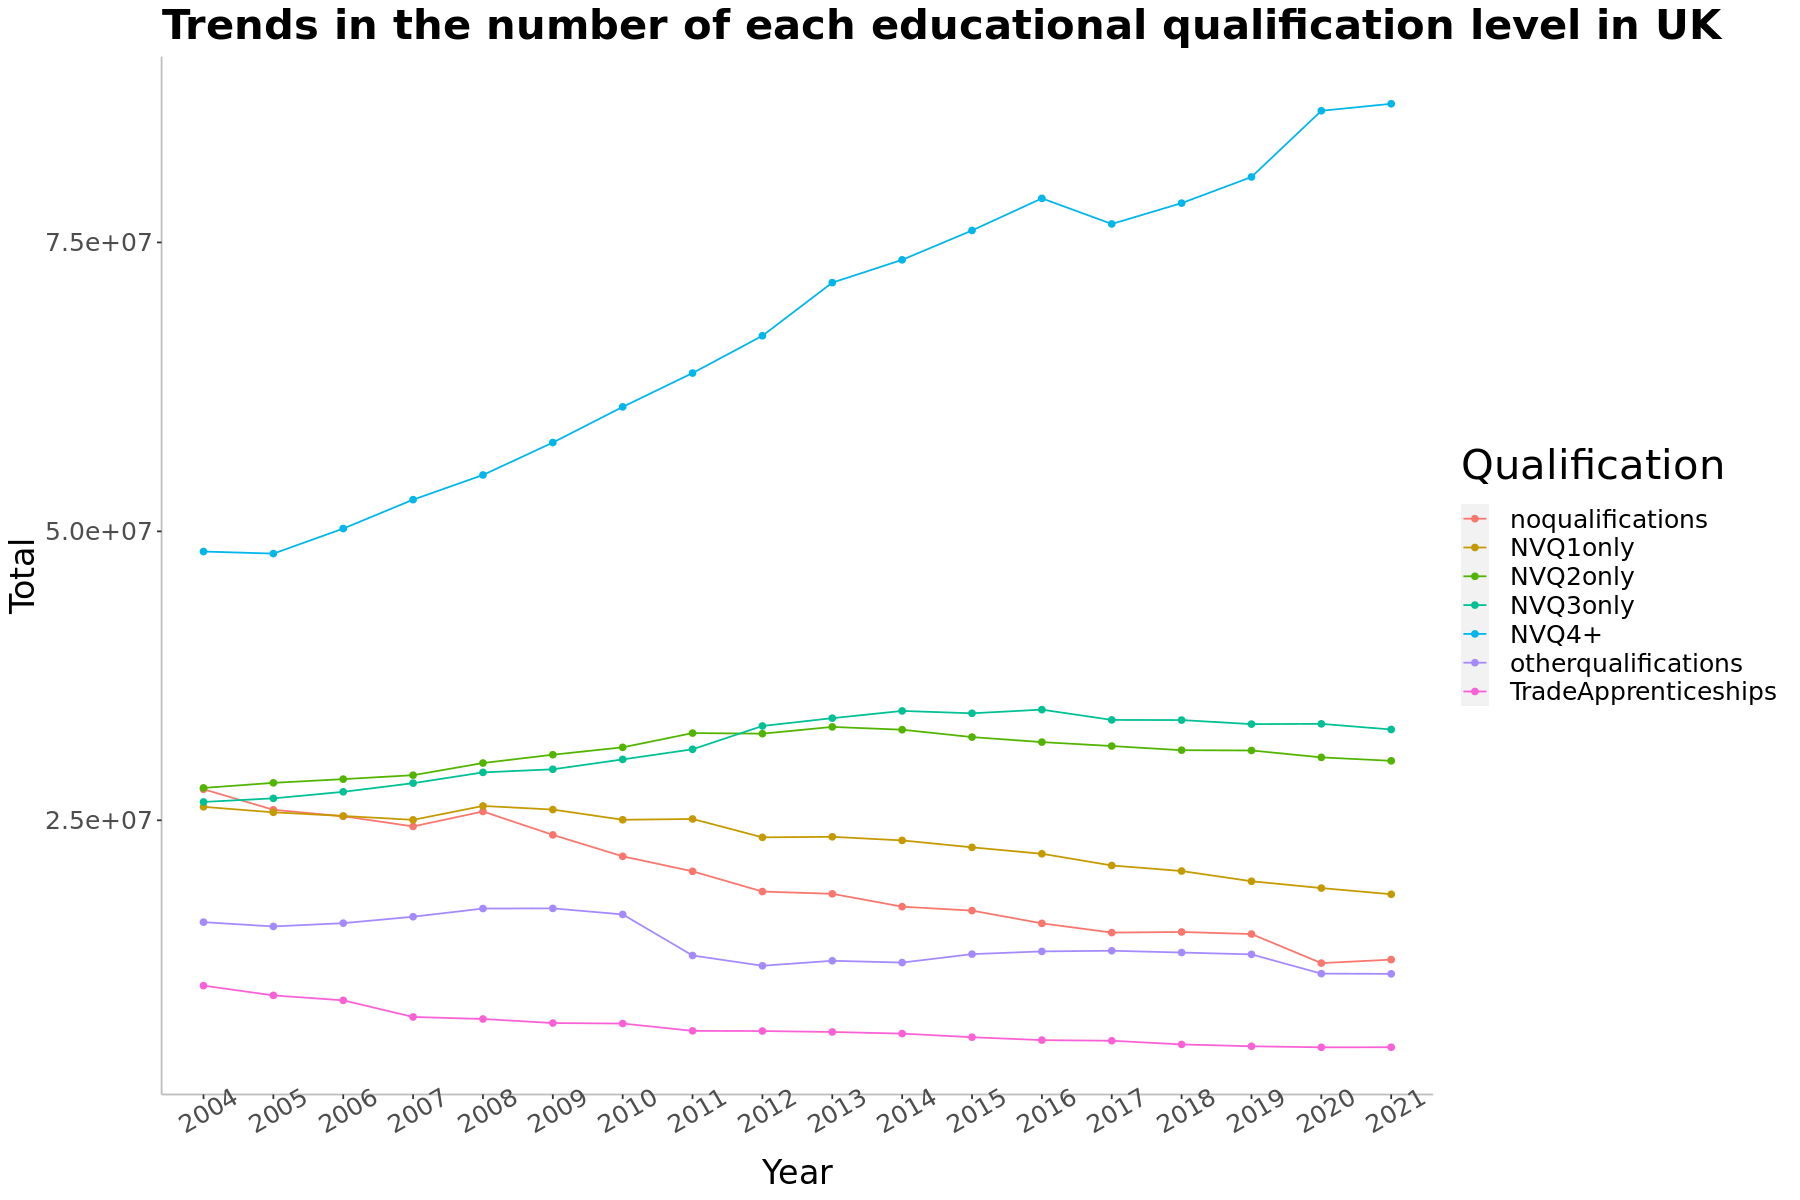

In [457]:
library(grid)
options(repr.plot.width = 15, repr.plot.height =10)
ggplot(data=total_trend, aes(x=Year, y=Total, group=Qualification)) +
  geom_line(aes(color=Qualification))+
  geom_point(aes(color=Qualification)) +  theme(axis.text.x = element_text(size = 15, angle = 30),
          axis.text.y = element_text(size = 15),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          legend.text = element_text(size = 15),
          legend.title = element_text(size = 25),
          plot.title = element_text(size = 25, face = "bold"),
          # Remove panel border
          panel.border = element_blank(),  
          # Remove panel grid lines
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          # Remove panel background
          panel.background = element_blank(),
          # Add axis line
          axis.line = element_line(colour = "grey")) +
    ggtitle("Trends in the number of each educational qualification level in UK")

# Data cleaning and aggregation

We need to change the column type to numeric for our analysis. Firstly, we need to remove the comma in the column and change the desire columns to numeric type.

In [14]:
top_three_la$number <- gsub(",", "", top_three_la$number)
top_three_la$denominator <- gsub(",", "", top_three_la$denominator)
top_three_la$percent <- gsub(",", "", top_three_la$percent)

top_three_la$number <- as.numeric(top_three_la$number)
top_three_la$denominator <- as.numeric(top_three_la$denominator)
top_three_la$percent <- as.numeric(top_three_la$percent)
head(top_three_la)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
757,E09000007,2004,Camden,351847.8,with no qualifications,12600,145500,8.7
758,E09000007,2004,Camden,351847.8,NVQ4+,68300,145500,46.9
759,E09000007,2004,Camden,351847.8,with other qualifications,29200,145500,20.1
760,E09000007,2004,Camden,351847.8,NVQ2 only,12200,145500,8.4
761,E09000007,2004,Camden,351847.8,NVQ3 only,13300,145500,9.2
762,E09000007,2004,Camden,351847.8,NVQ1 only,9100,145500,6.2


In [15]:
top_three_la$qualification <- as.factor(top_three_la$qualification)
summary(top_three_la)

     Code               Year              Area.x             AvgPrice      
 Length:738         Length:738         Length:738         Min.   : 104017  
 Class :character   Class :character   Class :character   1st Qu.: 130975  
 Mode  :character   Mode  :character   Mode  :character   Median : 187115  
                                                          Mean   : 453105  
                                                          3rd Qu.: 784835  
                                                          Max.   :1363802  
                                                                           
                qualification     number         denominator     
 NVQ1 only             :108   Min.   :    500   Min.   : 102100  
 NVQ3 only             :108   1st Qu.:  11700   1st Qu.: 156900  
 NVQ2 only             :102   Median : 101600   Median :1575200  
 NVQ4+                 :102   Mean   : 239898   Mean   :1673575  
 Trade Apprenticeships : 90   3rd Qu.: 354300   3rd Qu.:335730

In [16]:
test <- aggregate(top_three_la$number, by=list(top_three_la$qualification),FUN=sum, na.rm=TRUE)
test

Group.1,x
<fct>,<dbl>
NVQ4+,3521500
no qualifications,2647600
NVQ1 only,22540300
NVQ2 only,28283400
NVQ2 only,1710400
NVQ3 only,29869700
NVQ4+,50999000
other qualifications,1926400
Trade Apprenticeships,7562400


After we aggregated the qualification level we have found that there are still some instance data error (different input) and store the record in different format. We also need to clean this data error.

In [17]:
top_three_la$qualification[top_three_la$qualification == "with other qualifications"] <- "other qualifications"
top_three_la$qualification[top_three_la$qualification == "with no qualifications"] <- "no qualifications"
top_three_la$qualification <- gsub('\\s+', '', top_three_la$qualification)

In [18]:
head(top_three_la)

,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
757,E09000007,2004,Camden,351847.8,noqualifications,12600,145500,8.7
758,E09000007,2004,Camden,351847.8,NVQ4+,68300,145500,46.9
759,E09000007,2004,Camden,351847.8,otherqualifications,29200,145500,20.1
760,E09000007,2004,Camden,351847.8,NVQ2only,12200,145500,8.4
761,E09000007,2004,Camden,351847.8,NVQ3only,13300,145500,9.2
762,E09000007,2004,Camden,351847.8,NVQ1only,9100,145500,6.2


Firstly, let's see the total number of each education qualification level in the cities we selected. Then, we able to view each education proportion in the selected local authorities. To do this, we need to aggregate the data by the qualification level and area.

In [19]:
test1 <- aggregate(top_three_la$number, by=list(top_three_la$qualification, top_three_la$Area.x),FUN=sum, na.rm=TRUE)
colnames(test1) <- c('qualification', 'area', 'volume')
head(test1)

,qualification,area,volume
,<chr>,<chr>,<dbl>
1,noqualifications,Camden,233500
2,NVQ1only,Camden,189500
3,NVQ2only,Camden,233100
4,NVQ3only,Camden,326700
5,NVQ4+,Camden,1695700
6,otherqualifications,Camden,244600


# Plots

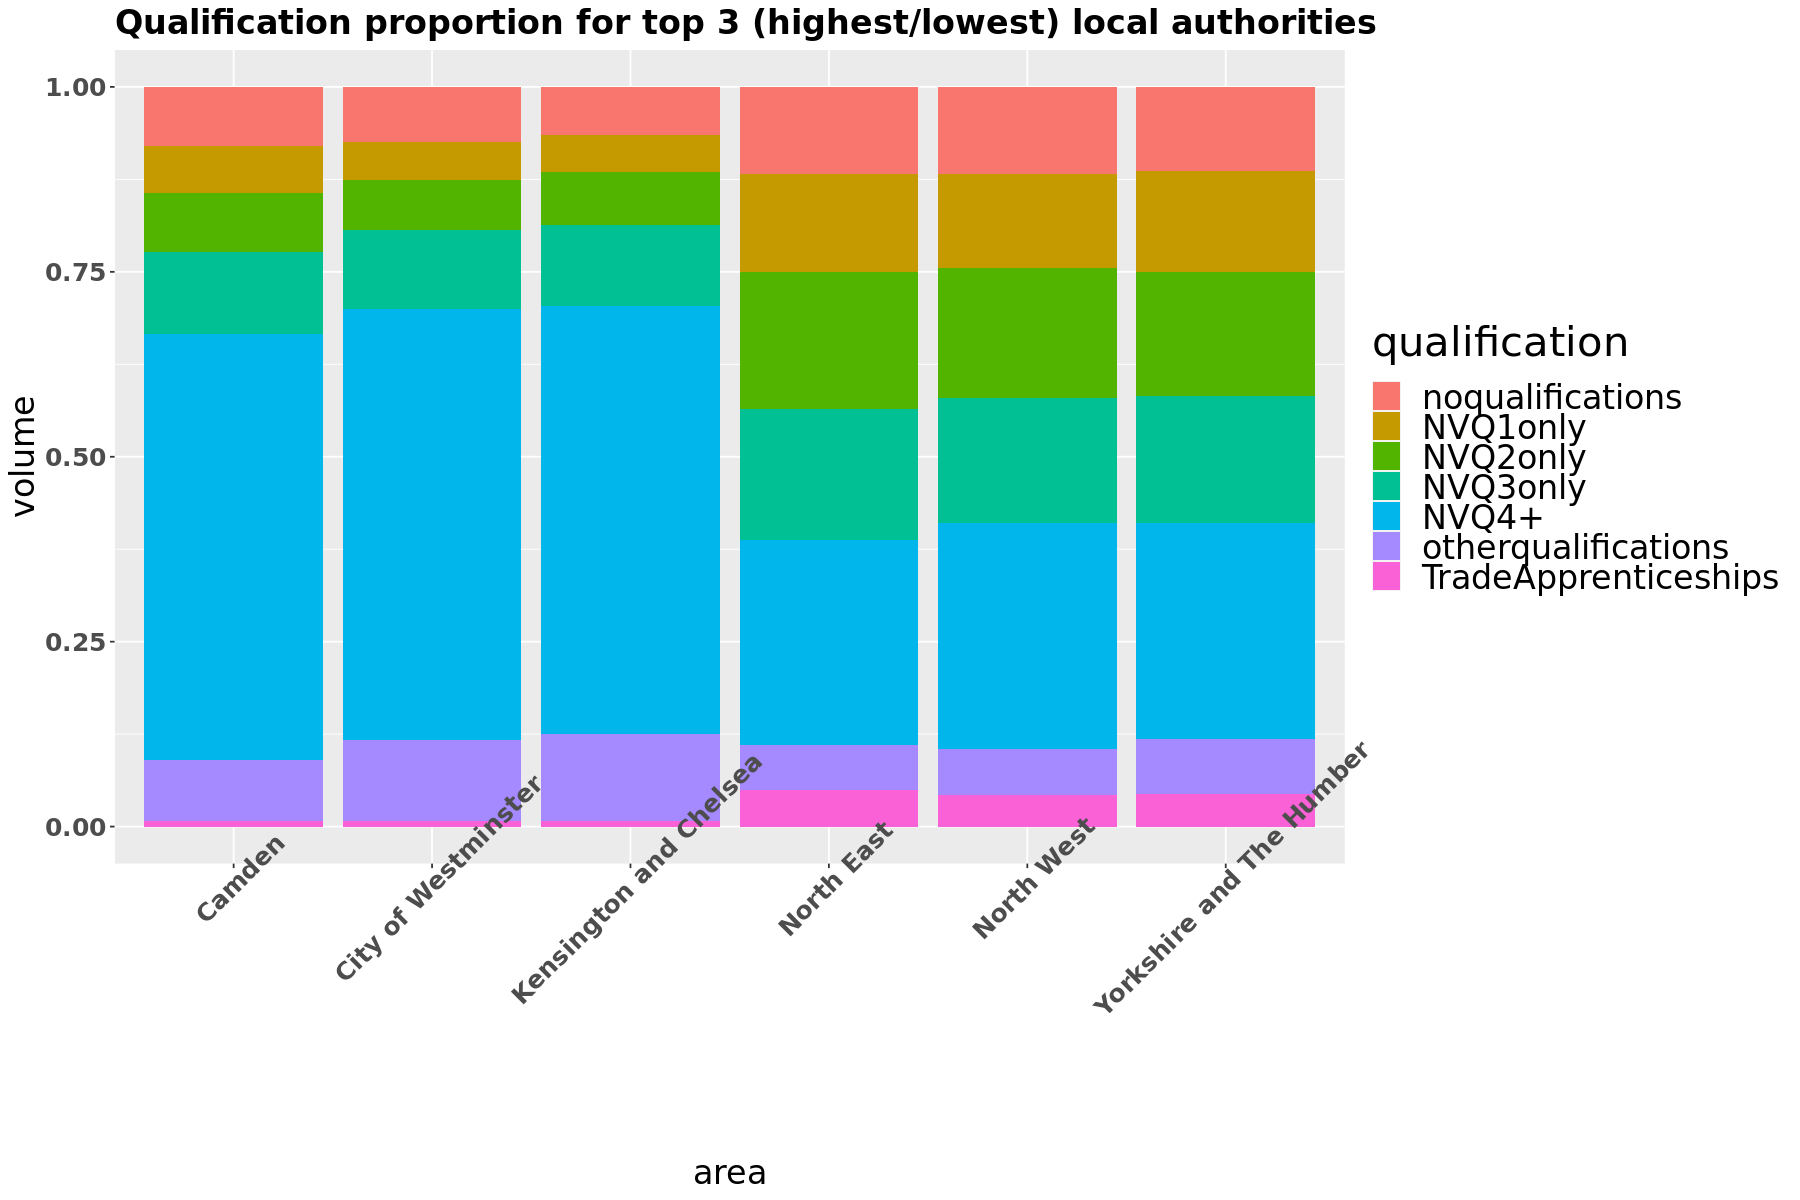

In [343]:
library(ggplot2)
options(repr.plot.width = 15, repr.plot.height =10)
ggplot(test1, width = 5, aes(fill=qualification, y=volume ,x=area)) + 
    geom_bar(position="fill", stat="identity") +
    theme(axis.text.x = element_text(angle = 45, size = 15, face = "bold"),
          axis.text.y = element_text(size = 15, face = "bold"),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          legend.text = element_text(size = 20),
          legend.title = element_text(size = 25),
          plot.title = element_text(size = 20, face = "bold")) +
    ggtitle("Qualification proportion for top 3 (highest/lowest) local authorities")

### Hight Housing Price changed local authorities (Camden, City of Westminster, Kensington and Chelsea)
### Low Housing Price changed local authorities (North East, North West, Yorkshire and The Humber)

According to this plot, we can clearly see that the local authorities that have housing price change larger have higher proportion of the education qualification with NVQ4+. However, the local authorities that have housing price change smaller doesn't demonstrate significant features. 

Let's assume that the number of the NQV4+ has the relationship with the housing price base on the plot information indicated above.

Then we can make the trend plot for the selected local authorities to proof the assumption.

In [21]:
test2 <- aggregate(top_three_la$number, by=list(top_three_la$qualification, top_three_la$Year, top_three_la$Area.x, top_three_la$AvgPrice),FUN=sum, na.rm=TRUE)
colnames(test2) <- c('qualification', 'year', 'area', 'AvgPrice', 'volume')
test2 <- test2[test2$qualification == 'NVQ4+', ]
test2 <- test2[ , 2:5]
test2 <- test2[order(test2$year),]

temp2_only_volume <- subset (test2, select = -c(AvgPrice))
temp2_only_volume$type <- "qualification"

temp2_only_price <- test2[, 1: (ncol(test2)-1)]
temp2_only_price$type <- "AvgPrice"
names(temp2_only_price)[3] <- "volume"
new_temp2 <- rbind(temp2_only_volume, temp2_only_price)

In [22]:
#install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggpubr"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("ggpubr"): unable to install packages


In [186]:


# new_temp2$year <- as.numeric(as.character(new_temp2$year))

# Camden <- ggplot(new_temp2[new_temp2$area=="Camden",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Camden")
# Camden

# City.of.Westminster <- ggplot(new_temp2[new_temp2$area=="City of Westminster",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("City of Westminster")
# City.of.Westminster

# Kensington.and.Chelsea <- ggplot(new_temp2[new_temp2$area=="Kensington and Chelsea",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Kensington and Chelsea")
# Kensington.and.Chelsea

# North.East <- ggplot(new_temp2[new_temp2$area=="North East",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("North East")
# North.East

# North.West <- ggplot(new_temp2[new_temp2$area=="North West",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("North West")
# North.West

# Yorkshire.and.The.Humber <- ggplot(new_temp2[new_temp2$area=="Yorkshire and The Humber",], aes(x = year, y = volume, color = type)) + geom_point() + geom_line() + 
# theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Yorkshire and The Humber")
# Yorkshire.and.The.Humber

# figure <- ggarrange(City.of.Westminster, Kensington.and.Chelsea, North.East,
#                     North.East, North.West, Yorkshire.and.The.Humber,
#                     labels = c("Camden", "City of Westminster", "Kensington and Chelsea", "North East", "North West", "Yorkshire and The Humber"),
#                     ncol = 2, nrow = 3)
# figure

Since the Y axis volume has huge distance between the NQV4+ volume and the average house price in UK. Thus, the trend doesn't clearly demonstrate the trend. Thus, let's try plot the volume and price respectly.

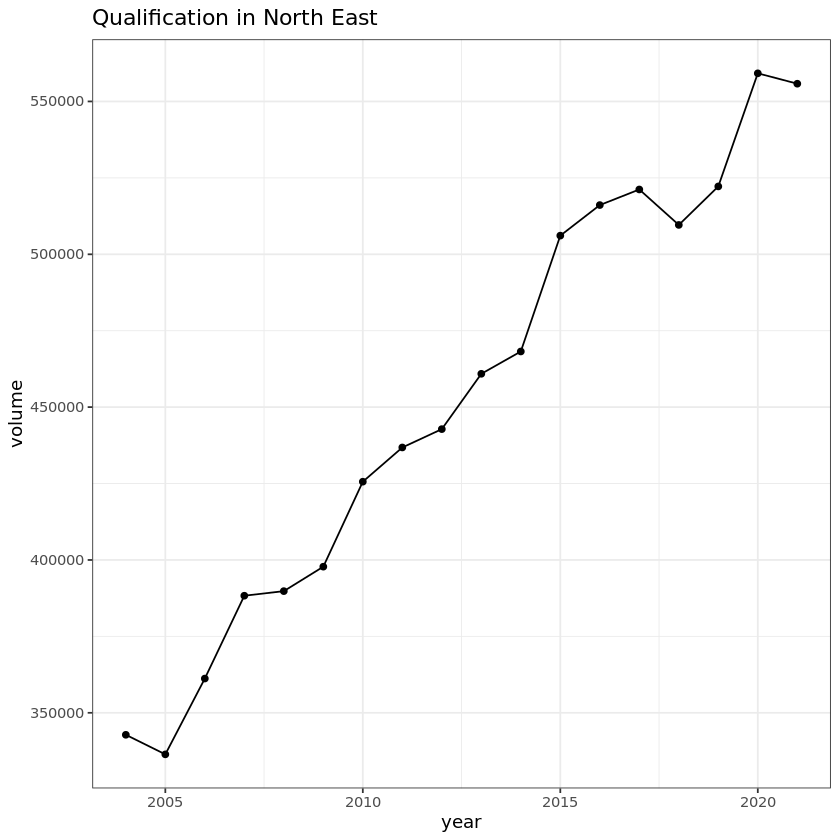

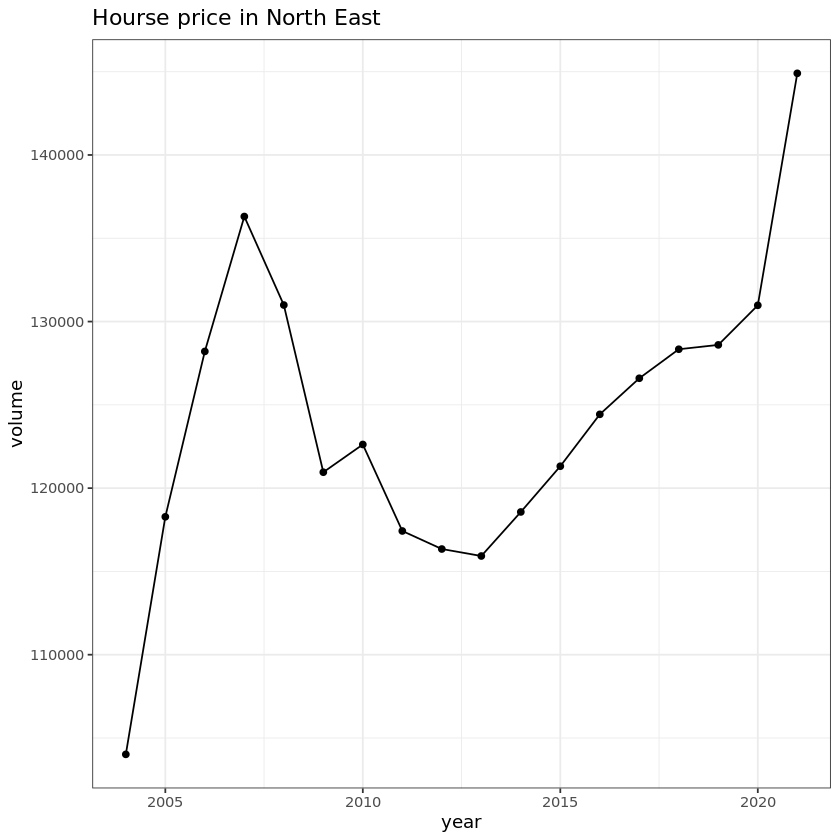

In [24]:
temp2_only_volume$year <- as.numeric(as.character(temp2_only_volume$year))
temp2_only_price$year <- as.numeric(as.character(temp2_only_price$year))

ggplot(temp2_only_volume[temp2_only_volume$area=="North East",], aes(x = year, y = volume)) + geom_point() + geom_line() + 
theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Qualification in North East")

ggplot(temp2_only_price[temp2_only_price$area=="North East",], aes(x = year, y = volume)) + geom_point() + geom_line() + 
theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Hourse price in North East")

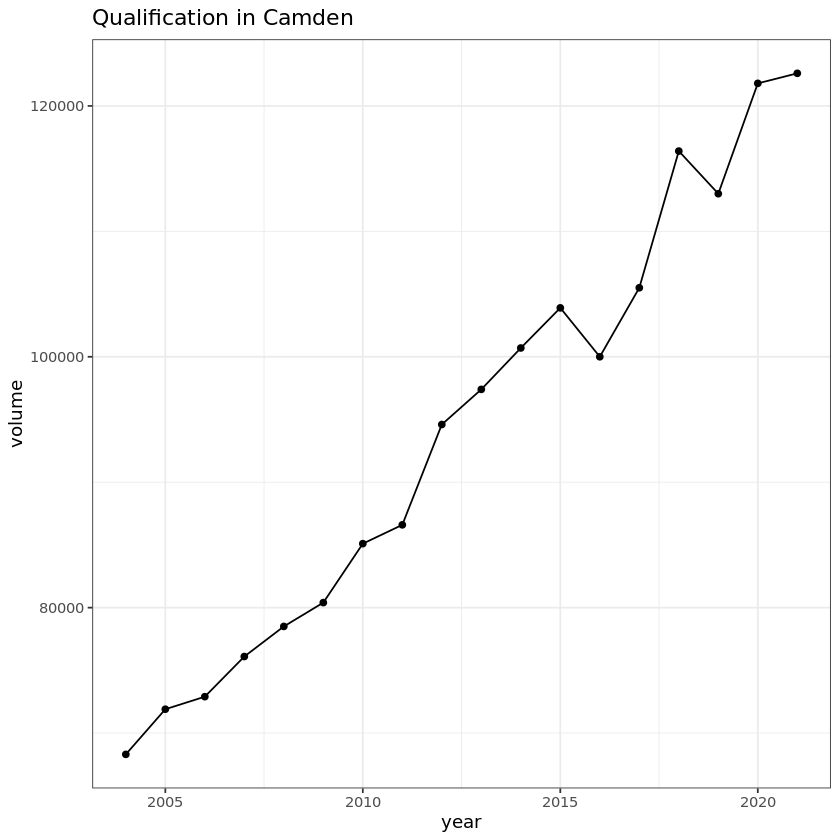

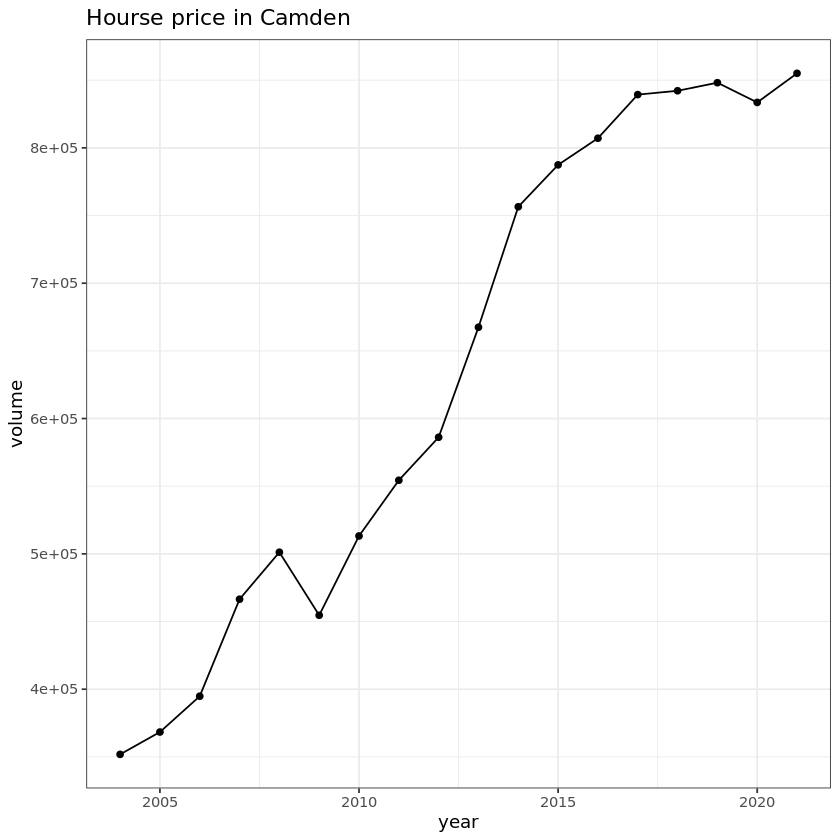

In [25]:
ggplot(temp2_only_volume[temp2_only_volume$area=="Camden",], aes(x = year, y = volume)) + geom_point() + geom_line() + 
theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Qualification in Camden")

ggplot(temp2_only_price[temp2_only_price$area=="Camden",], aes(x = year, y = volume)) + geom_point() + geom_line() + 
theme(axis.text.x = element_text(angle = 45))+ theme_bw() + ggtitle("Hourse price in Camden")

In [356]:
local_authority_qualication2 <- local_authority_qualication
local_authority_qualication2$qualification[local_authority_qualication2$qualification == "with other qualifications"] <- "other qualifications"
local_authority_qualication2$qualification[local_authority_qualication2$qualification == "with no qualifications"] <- "no qualifications"
local_authority_qualication2$qualification <- gsub('\\s+', '', local_authority_qualication2$qualification)

test2 <- local_authority_qualication[apply(local_authority_qualication['qualification'] == "NVQ4+",1,any),]
test2$number <- gsub(",", "", test2$number)
test2$number <- as.numeric(test2$number)

,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
5873,S92000003,2004,Scotland,89789.82,NVQ4+,961000,"3,181,100",30.2
4159,E12000001,2004,North East,104016.88,NVQ4+,342800,"1,566,600",21.9
5874,S92000003,2005,Scotland,104859.47,NVQ4+,983400,"3,206,700",30.7
4289,E12000002,2004,North West,110358.65,NVQ4+,981500,"4,214,800",23.3
4415,E12000003,2004,Yorkshire and The Humber,110994.67,NVQ4+,708600,"3,128,600",22.6
5998,W92000004,2004,Wales,112693.29,NVQ4+,426900,"1,792,100",23.8


The plot doesn't demonstrate clearly relationship instance for the NQV4+ education qualication volume with the house price. Let's use a linear regression to check whether the two variables have a linear relationship

# Iinear regression test

In [414]:
high_price_change_qualification <- test2[order(test2$AvgPrice, decreasing=TRUE),]
head(high_price_change_qualification)

,Code,Year,Area.x,AvgPrice,qualification,number,denominator,percent
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2489,E09000020,2017,Kensington and Chelsea,1344540,NVQ4+,67200,"104,600",64.2
2517,E09000020,2021,Kensington and Chelsea,1336039,NVQ4+,65200,102100,63.8
2510,E09000020,2020,Kensington and Chelsea,1320568,NVQ4+,69400,103300,67.2
2475,E09000020,2015,Kensington and Chelsea,1302103,NVQ4+,70200,"107,600",65.3
2471,E09000020,2014,Kensington and Chelsea,1288406,NVQ4+,66900,"107,600",62.2
2482,E09000020,2016,Kensington and Chelsea,1276235,NVQ4+,67500,"108,100",62.4


In [418]:
qualifcation_lm_data <- high_price_change_qualification[1:100, ]

qualifcation_lm_data <- qualifcation_lm_data[!apply(qualifcation_lm_data['number'] < 10000,1,any),]
qualifcation_lm_data <- qualifcation_lm_data[!apply(qualifcation_lm_data['AvgPrice'] > 1000000,1,any),]
lmfit_qualification2<-with(qualifcation_lm_data,lm(AvgPrice~number))
summary(lmfit_qualification2)


Call:
lm(formula = AvgPrice ~ number)

Residuals:
    Min      1Q  Median      3Q     Max 
-150967 -109884  -33392   86674  329538 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.777e+05  1.698e+04  39.906   <2e-16 ***
number      -1.104e-01  6.893e-02  -1.602    0.113    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 128900 on 82 degrees of freedom
Multiple R-squared:  0.03035,	Adjusted R-squared:  0.01853 
F-statistic: 2.567 on 1 and 82 DF,  p-value: 0.113


`geom_smooth()` using formula 'y ~ x'



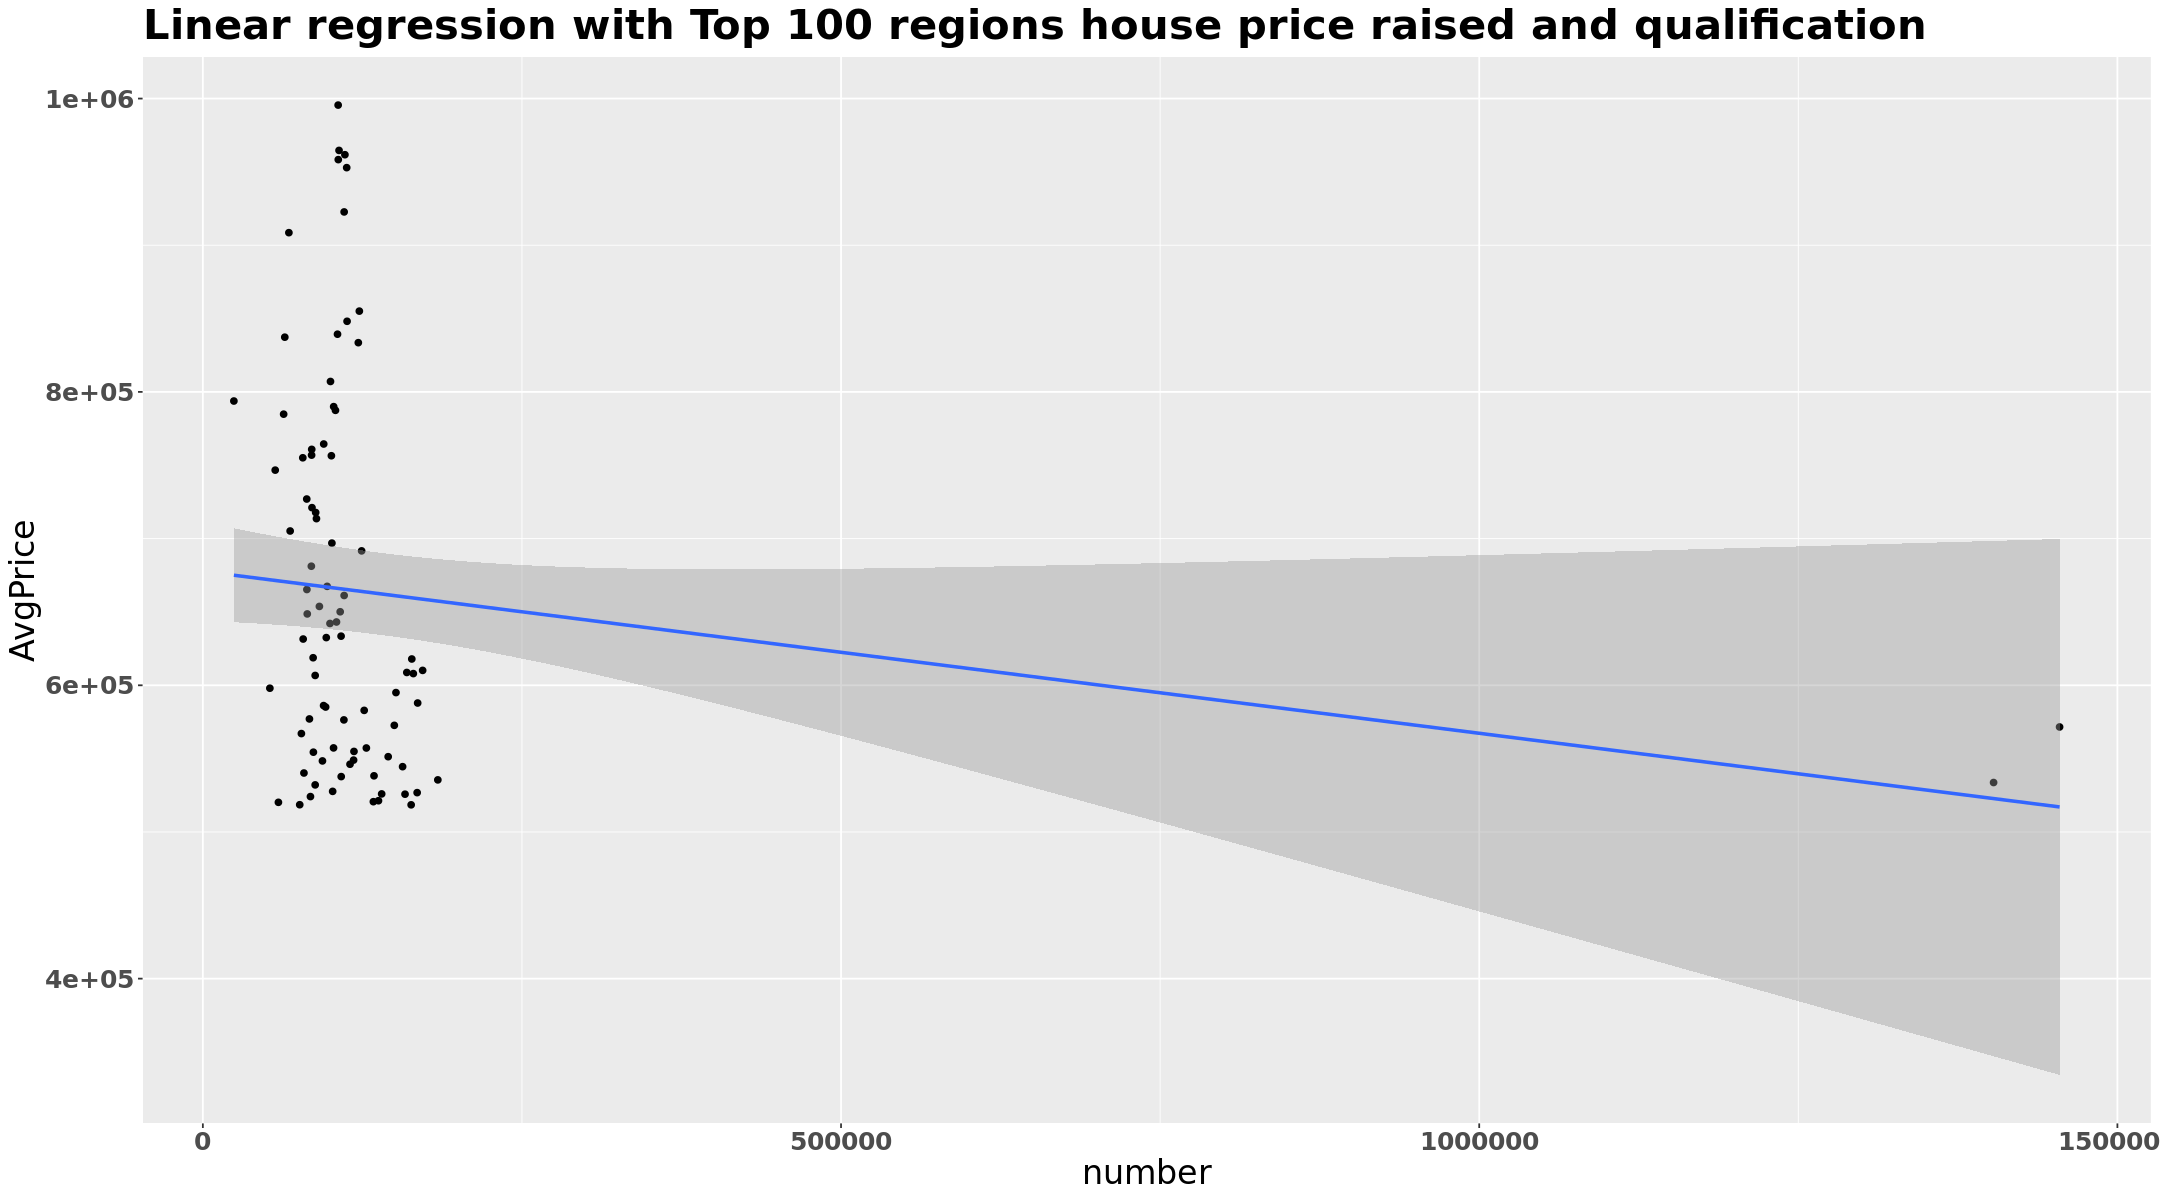

In [420]:
ggplot(lmfit_qualification2,aes(number, AvgPrice)) +
  geom_point() +
  geom_smooth(method='lm') +
  theme(axis.text.x = element_text(size = 15, face = "bold"),
          axis.text.y = element_text(size = 15, face = "bold"),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          plot.title = element_text(size = 25, face = "bold")) +
          ggtitle("Linear regression with Top 100 regions house price raised and qualification")

There are no linear relationship between the housing price and the volume of high education qualication people in the local authority in UK. However, we found that the local authority which increased significantlly might have more higher education qualification in that local authority.

# Population

In [284]:
head(UK_hourse_price_agg)

,Year,Area,Code,AvgPrice
,<chr>,<chr>,<chr>,<dbl>
1,1995,Hartlepool,E06000001,40691.89
2,1996,Hartlepool,E06000001,39904.88
3,1997,Hartlepool,E06000001,39702.56
4,1998,Hartlepool,E06000001,40875.98
5,1999,Hartlepool,E06000001,40578.50
6,2000,Hartlepool,E06000001,43574.22


In [285]:
library("readxl")

In [286]:
population <- read_excel("2020_LC_low.xlsx")

In [287]:
head(population)

gss_code,borough,year,population
<chr>,<chr>,<dbl>,<dbl>
E12000007,London (total),2011,8204407
E12000007,London (total),2012,8308833
E12000007,London (total),2013,8417460
E12000007,London (total),2014,8539398
E12000007,London (total),2015,8666930
E12000007,London (total),2016,8769659


In [288]:
population <- population[!apply(population['year']>2021,1,any),]

In [289]:
population <- population[!apply(population['gss_code']=='E12000007',1,any),]

In [290]:
str(population)

tibble [363 × 4] (S3: tbl_df/tbl/data.frame)
 $ gss_code  : chr [1:363] "E09000001" "E09000001" "E09000001" "E09000001" ...
 $ borough   : chr [1:363] "City of London" "City of London" "City of London" "City of London" ...
 $ year      : num [1:363] 2011 2012 2013 2014 2015 ...
 $ population: num [1:363] 7412 6612 6033 6139 6687 ...


In [291]:
colnames(population) <- c('Code', 'Area', 'Year', 'Population')
population$Area <- as.factor(population$Area)

In [427]:
a <- population[order(population$Population ),]
head(a)

Code,Area,Year,Population
<chr>,<fct>,<dbl>,<dbl>
E09000001,City of London,2013,6032.871
E09000001,City of London,2014,6139.093
E09000001,City of London,2012,6612.000
E09000001,City of London,2015,6687.000
E09000001,City of London,2016,7246.000
E09000001,City of London,2011,7412.000


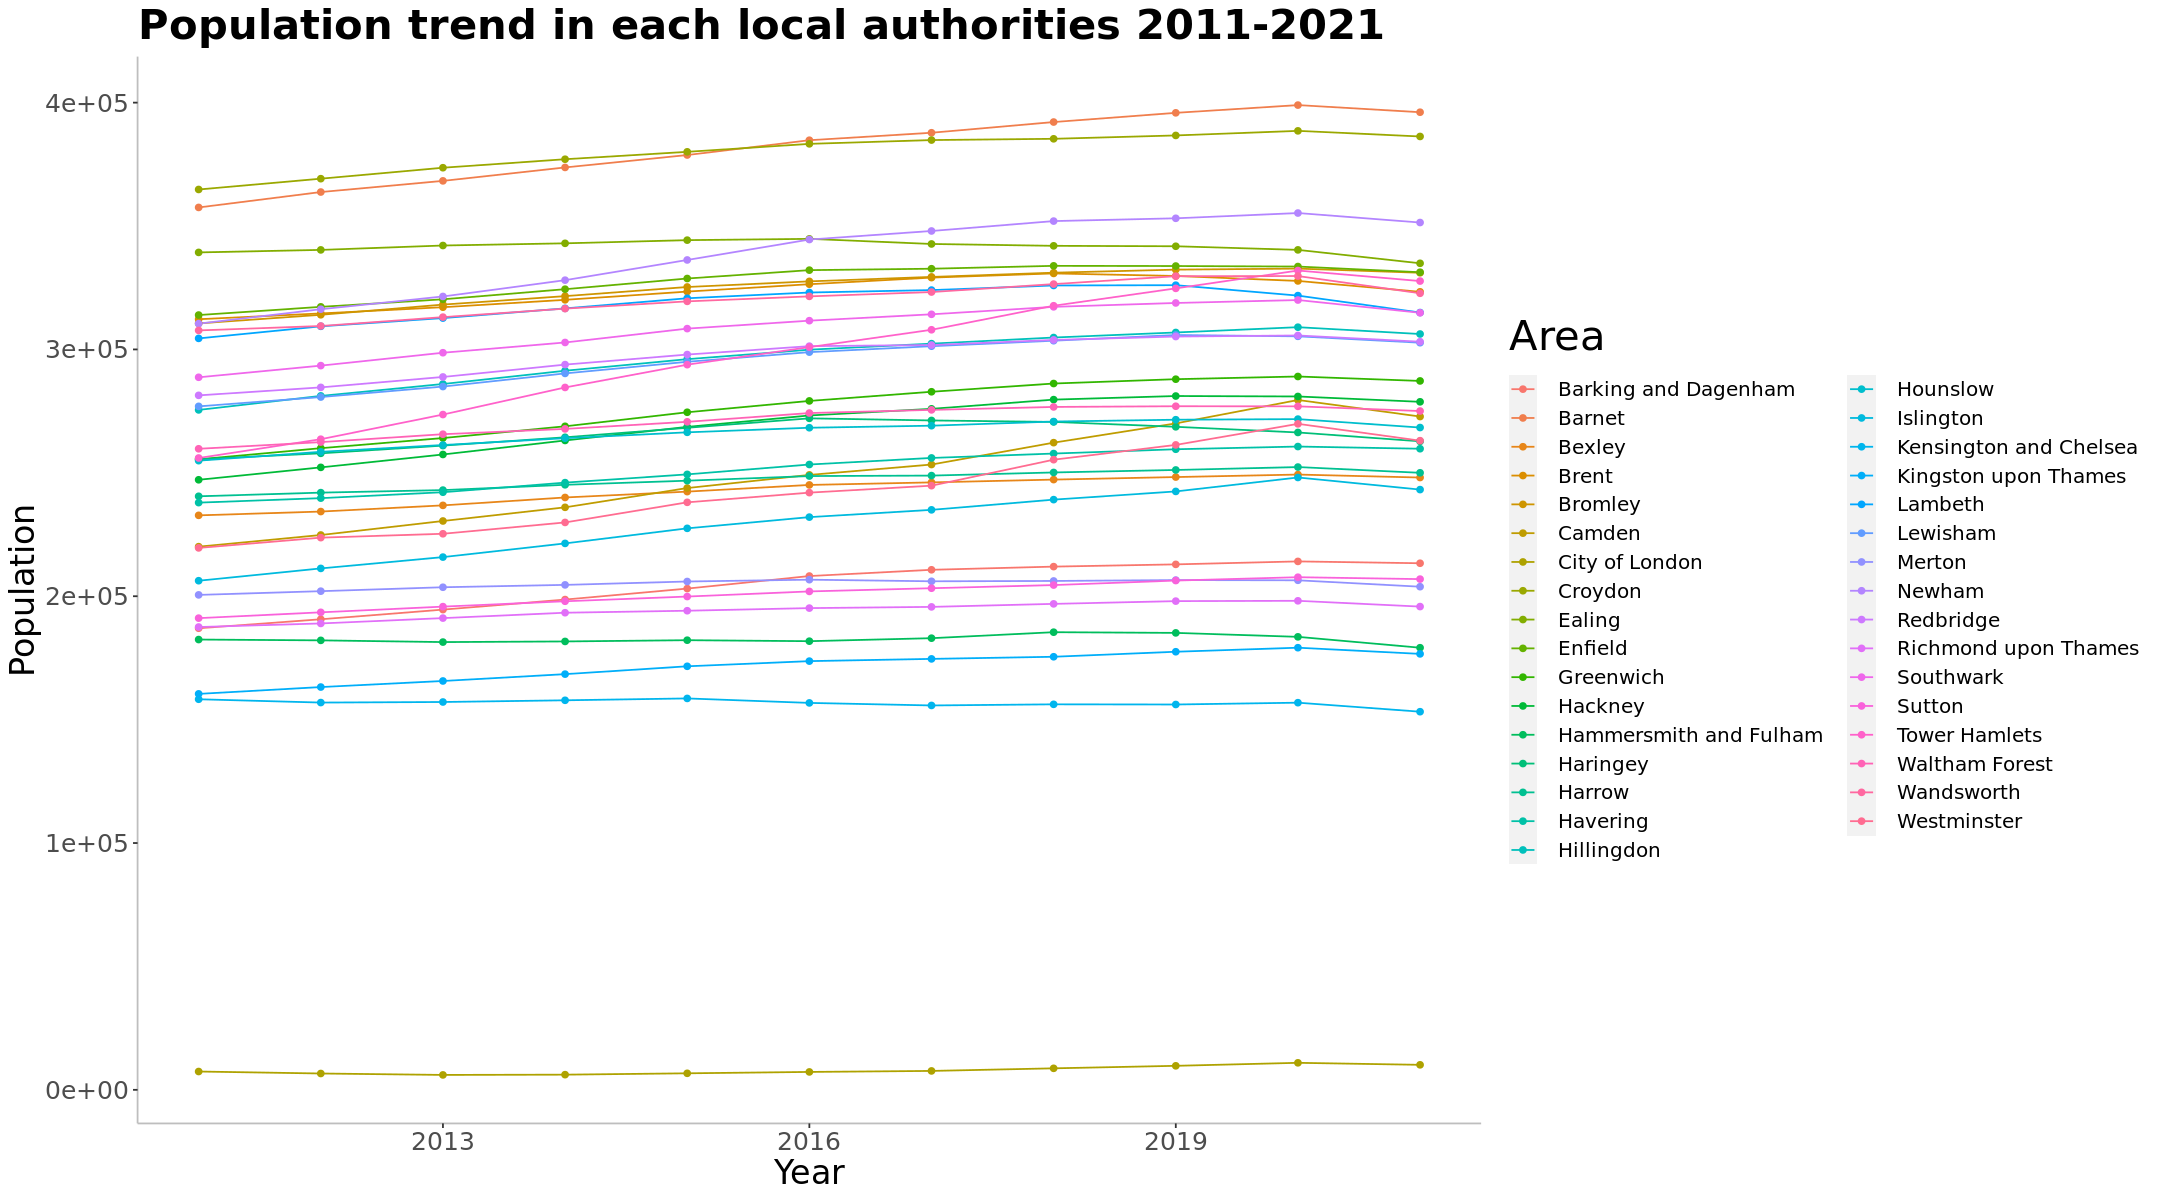

In [422]:
options(repr.plot.width = 18, repr.plot.height =10)
ggplot(data=population, aes(x=Year, y=Population, group=Area)) +
  geom_line(aes(color=Area))+
  geom_point(aes(color=Area)) + theme(axis.text.x = element_text( size = 15),
          axis.text.y = element_text(size = 15),
          axis.title.x = element_text(size = 20),
          axis.title.y = element_text(size = 20),
          legend.text = element_text(size = 12),
          legend.title = element_text(size = 25),
          plot.title = element_text(size = 25, face = "bold"),
          panel.border = element_blank(),
          panel.background = element_blank(),
          # Add axis line
          axis.line = element_line(colour = "grey")) +
    ggtitle("Population trend in each local authorities 2011-2021")

In [293]:
colnames(population) <- c("Code", "Area", "Year", "Population")

In [294]:
local_authority_population <- merge(UK_hourse_price_agg, population, by=c("Code", "Year"))

In [295]:
local_authority_population <- subset (local_authority_population, select = -c(Area.y))

In [296]:
head(local_authority_population)

,Code,Year,Area.x,AvgPrice,Population
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E09000001,2011,City of London,463930.8,7412.000
2,E09000001,2012,City of London,525327.6,6612.000
3,E09000001,2013,City of London,570008.7,6032.871
4,E09000001,2014,City of London,709385.5,6139.093
5,E09000001,2015,City of London,760253.0,6687.000
6,E09000001,2016,City of London,818315.6,7246.000


In [297]:
price_growth_rate = vector()
population_growth_rate = vector()
for (i in 1:nrow(local_authority_population['AvgPrice'])) {
    if (local_authority_population[i, 'Year'] == 2021) {
        
    } else {
     price_growth_rate[i] <- (local_authority_population[i + 1,'AvgPrice'] - local_authority_population[ i, 'AvgPrice'])/local_authority_population[ i, 'AvgPrice']
    }
    if (i == 363) {
        price_growth_rate[i] <- ""
    }
}

for (i in 1:nrow(local_authority_population['Population'])) {
    if (local_authority_population[i, 'Year'] == 2021) {
        
    } else {
     population_growth_rate[i] <- (local_authority_population[i + 1,'Population'] - local_authority_population[ i, 'Population'])/local_authority_population[ i, 'Population']
    }
    if (i == 363) {
        population_growth_rate[i] <- ""
    }
}

In [298]:
local_authority_population$price_growth <- price_growth_rate
local_authority_population$price_growth <- price_growth_rate
local_authority_population$population_growth <- population_growth_rate

local_authority_population$price_growth <- as.numeric(local_authority_population$price_growth)
local_authority_population$population_growth <- as.numeric(local_authority_population$population_growth)

local_authority_population$price_growth <- round(local_authority_population$price_growth, digit = 2)
local_authority_population$population_growth <- round(local_authority_population$population_growth, digit = 2)

In [299]:
head(local_authority_population)

,Code,Year,Area.x,AvgPrice,Population,price_growth,population_growth
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,E09000001,2011,City of London,463930.8,7412.000,0.13,-0.11
2,E09000001,2012,City of London,525327.6,6612.000,0.09,-0.09
3,E09000001,2013,City of London,570008.7,6032.871,0.24,0.02
4,E09000001,2014,City of London,709385.5,6139.093,0.07,0.09
5,E09000001,2015,City of London,760253.0,6687.000,0.08,0.08
6,E09000001,2016,City of London,818315.6,7246.000,0.04,0.06


In [300]:
temp_population_price <- subset (local_authority_population, select = -c(AvgPrice, Population))

In [301]:
head(temp_population_price)

,Code,Year,Area.x,price_growth,population_growth
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,E09000001,2011,City of London,0.13,-0.11
2,E09000001,2012,City of London,0.09,-0.09
3,E09000001,2013,City of London,0.24,0.02
4,E09000001,2014,City of London,0.07,0.09
5,E09000001,2015,City of London,0.08,0.08
6,E09000001,2016,City of London,0.04,0.06


In [302]:
average_price_and_population <- aggregate(temp_population_price[, 4:5], by=list(temp_population_price$Area.x, temp_population_price$Code),FUN=mean, na.rm=TRUE)

In [303]:
colnames(average_price_and_population) <- c("Area", "Code", "price_growth", "population_growth")

average_price_and_population_price <- temp_population_price[,1:4]
average_price_and_population_price$Type <- "price"
average_price_and_population_population <- subset(temp_population_price, select = -c(price_growth))
average_price_and_population_population$Type <- "population"

colnames(average_price_and_population_price) <- c("Code", "Year", "Area", "Growth", "Type")
colnames(average_price_and_population_population) <- c("Code", "Year", "Area", "Growth", "Type")

bar_price_population <- rbind(average_price_and_population_price, average_price_and_population_population)

In [304]:
bar_price_population_agg <- aggregate(bar_price_population['Growth'], by=list(bar_price_population$Code, bar_price_population$Area, bar_price_population$Type),FUN=mean, na.rm=TRUE)

In [305]:
colnames(bar_price_population_agg) <- c("Code", "Area", "Type", "Growth")

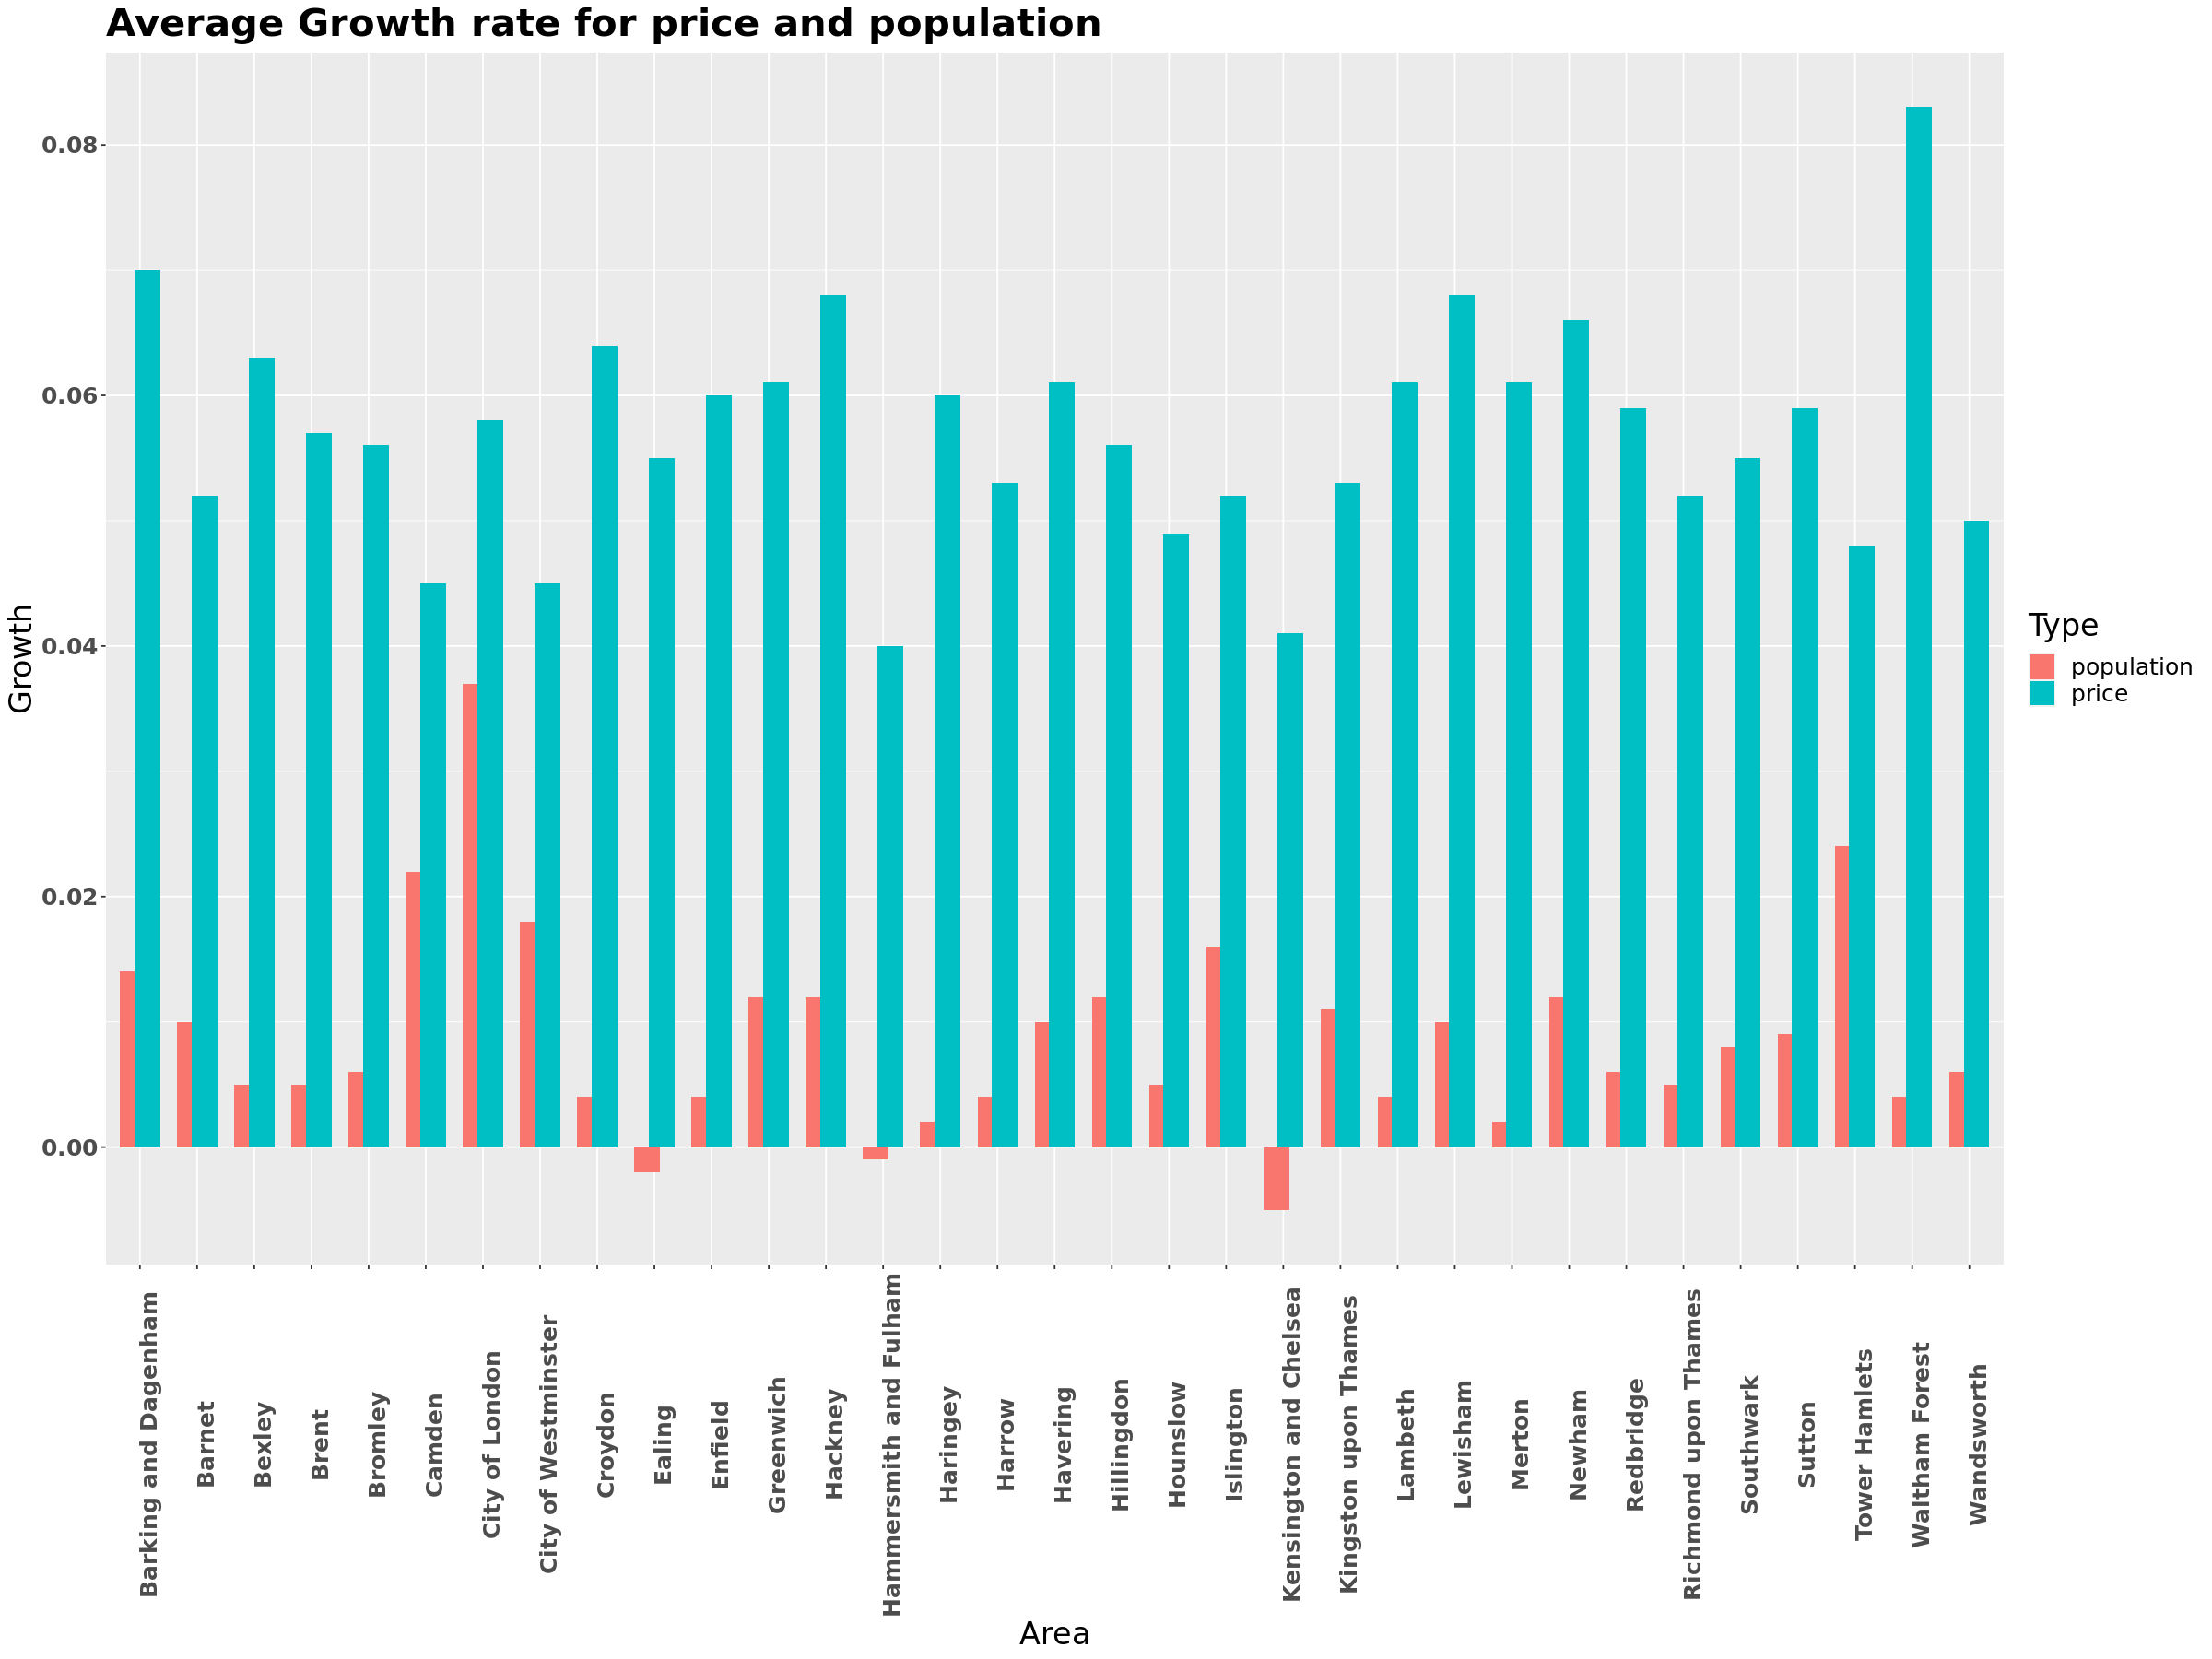

In [436]:
options(repr.plot.width = 20, repr.plot.height =15)
ggplot(bar_price_population_agg, aes(Area, Growth, fill = Type)) +
geom_bar(stat="identity", position = position_dodge(width=0.5)) +
theme(
    axis.text.y=element_text(size = 15, face = "bold"),
    axis.title.x=element_text(size = 20),
    axis.title.y=element_text(size = 20),
    axis.text.x=element_text(angle = 90, size = 15, face = "bold"),
    legend.text = element_text(size = 15),
    legend.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold")
) + 

ggtitle("Average Growth rate for price and population")

In [398]:
high_price_change <- local_authority_population[order(local_authority_population$AvgPrice, decreasing=TRUE),]
nrow(high_price_change)
high_price_change <- high_price_change[!apply(high_price_change['Population'] < 15000,1,any),]


[1] 363

In [399]:
high_price_change_Lm <- high_price_change[1:100, ]

lmfit_high_change_la<-with(high_price_change_Lm,lm(AvgPrice~Population))
summary(lmfit_high_change_la)


Call:
lm(formula = AvgPrice ~ Population)

Residuals:
    Min      1Q  Median      3Q     Max 
-339234 -120360  -57635  101253  467968 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.202e+06  7.661e+04  15.688  < 2e-16 ***
Population  -1.960e+00  3.002e-01  -6.529 2.95e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 191900 on 98 degrees of freedom
Multiple R-squared:  0.3031,	Adjusted R-squared:  0.296 
F-statistic: 42.63 on 1 and 98 DF,  p-value: 2.95e-09


`geom_smooth()` using formula 'y ~ x'



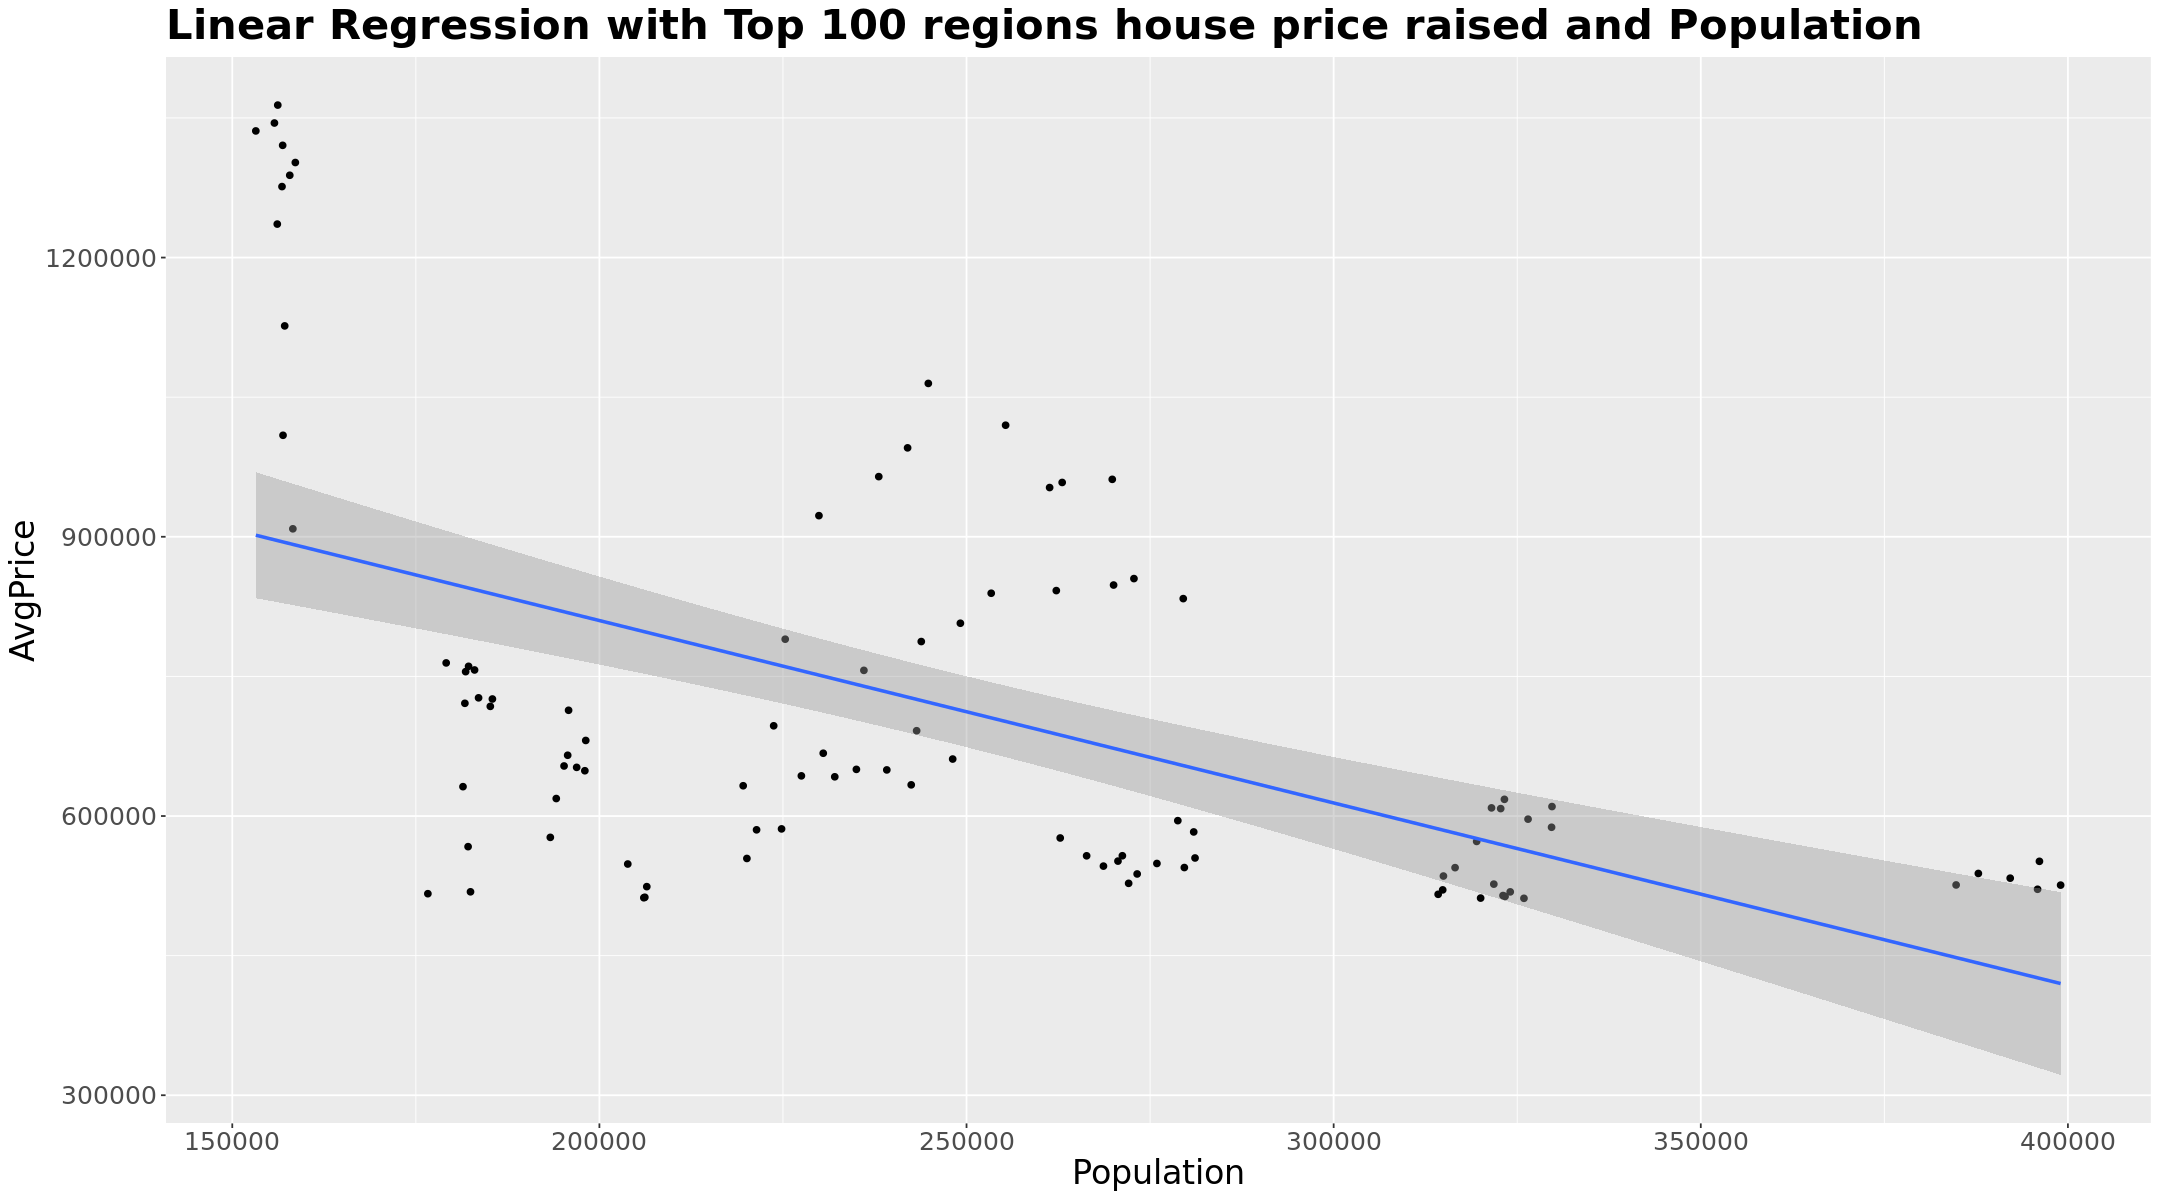

In [400]:
ggplot(lmfit_high_change_la,aes(Population, AvgPrice)) +
  geom_point() +
  geom_smooth(method='lm') +
  theme(axis.text.y=element_text(size = 15),
    axis.title.x=element_text(size = 20),
    axis.title.y=element_text(size = 20),
    axis.text.x=element_text(size = 15),
    plot.title = element_text(size = 25, face = "bold")) +
ggtitle("Linear Regression with Top 100 regions house price raised and Population")